### **INDEX**
1. Setup notebook
2. Data cleaning
3. Insight exploratory analysis
4. Hypothesis
   1. What does the yearly release of LEGO sets by age look like?
   2. AFOL: Adult Fans Of LEGO
      1. How does LEGO distribute its set portfolio across age?
      2. Which market has the most adults playing lego?
     
_Please note: The cluster analysis is prepared in a seperate Notebook._

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **1. SETUP NOTEBOOK**

In [4]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from pathlib import Path

In [5]:
# activate inline matplotlib visuals 
%matplotlib inline

In [6]:
# get the current working directory as a Path object
path = Path.cwd()

# update the path to parent folder
parent_path = path.parent

In [7]:
# import lego data set
csv_file_path = parent_path / '2 Data' / 'Prepared data' / 'lego_analysis.csv'

# import data as datafram
df_lego_analysis = pd.read_csv(csv_file_path)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

## **2. DATA CLEANING**

In [10]:
# basic checks: missing values
df_lego_analysis.isnull().sum()

Unnamed: 0              0
set_number              0
setID                   0
name                    0
year                    0
theme                   0
themeGroup             15
subtheme              879
category                0
pieces                122
minifigs             2334
ownedBy                 8
wantedBy                0
rating                  0
reviewCount             0
packagingType           0
availability            0
instructionsCount       0
minAge               2190
US_retailPrice       2790
UK_retailPrice       2732
CA_retailPrice       3225
DE_retailPrice       4331
PL_retailPrice        714
status                  0
year_time               0
year_period             0
set_num                 0
theme_id              212
num_parts             212
num_colors            167
num_materials         167
sum_spares            167
dtype: int64

In [11]:
# basic checks: count duplicates
df_lego_analysis.duplicated().sum()

0

In [12]:
# cleaning: drop <LEGO age where 'minAge' is 2 or 3
df_lego_analysis = df_lego_analysis[~df_lego_analysis['minAge'].isin([2, 3])].reset_index(drop=True)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

## **3. INSIGHT**

**INSIGHT EXPLORATORY ANALYSIS**

In [17]:
# normalize retail prizes and include 

#get exchange rates in USD
exchange_rates = {
    'US_retailPrice': 1,  # USD (base currency)
    'UK_retailPrice': 1.36,  # Assuming 1 GBP = 1.36 USD
    'CA_retailPrice': 0.79,  # Assuming 1 CAD = 0.79 USD
    'DE_retailPrice': 1.18,  # Assuming 1 EUR = 1.18 USD
    'PL_retailPrice': 0.26   # Assuming 1 PLN = 0.26 USD
}

#normalize each market retail price by exchange rates + handling NaNs as 0
df_lego_analysis['US_normalized'] = df_lego_analysis['US_retailPrice'].fillna(0) * exchange_rates['US_retailPrice']
df_lego_analysis['UK_normalized'] = df_lego_analysis['UK_retailPrice'].fillna(0) * exchange_rates['UK_retailPrice']
df_lego_analysis['CA_normalized'] = df_lego_analysis['CA_retailPrice'].fillna(0) * exchange_rates['CA_retailPrice']
df_lego_analysis['DE_normalized'] = df_lego_analysis['DE_retailPrice'].fillna(0) * exchange_rates['DE_retailPrice']
df_lego_analysis['PL_normalized'] = df_lego_analysis['PL_retailPrice'].fillna(0) * exchange_rates['PL_retailPrice']

#create new column where average retail price across the 5 markets is calculated in dollars
df_lego_analysis['avg_rp'] = df_lego_analysis[['US_normalized', 'UK_normalized', 'CA_normalized', 'DE_normalized', 'PL_normalized']].mean(axis=1).round(2)

df_lego_analysis[['US_normalized', 'UK_normalized', 'CA_normalized', 'DE_normalized', 'PL_normalized', 'avg_rp']]

,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp
0,229.99,271.9864,236.9921,271.3882,285.9974,259.27
1,0.00,0.0000,0.0000,0.0000,4.6774,0.94
2,0.00,0.0000,0.0000,0.0000,4.6774,0.94
3,0.00,0.0000,0.0000,0.0000,4.6774,0.94
4,0.00,0.0000,0.0000,0.0000,4.6774,0.94
...,...,...,...,...,...,...
7801,0.00,0.0000,0.0000,0.0000,3.3774,0.68
7802,0.00,0.0000,0.0000,0.0000,54.6000,10.92
7803,0.00,0.0000,0.0000,0.0000,137.7974,27.56
7804,0.00,0.0000,0.0000,0.0000,12.7400,2.55


In [18]:
# check global average retail price in USD
df_lego_analysis['avg_rp'].describe()

count    7806.000000
mean       35.456093
std        60.111913
min         0.000000
25%         4.390000
50%        16.115000
75%        40.832500
max       944.410000
Name: avg_rp, dtype: float64

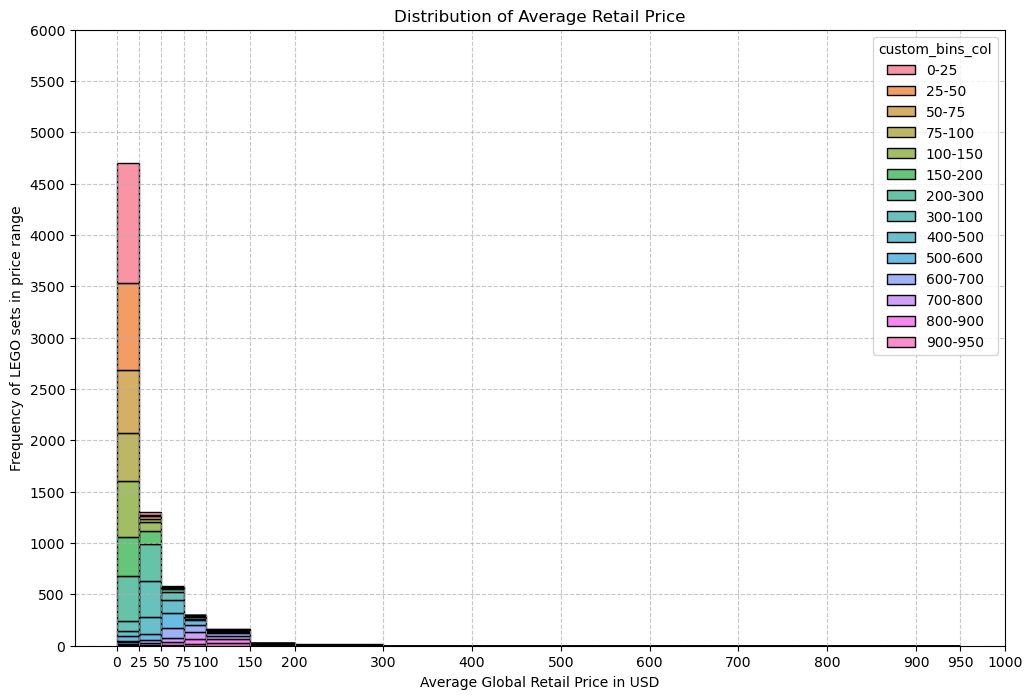

In [19]:
# create bins to plot lego pieces
custom_bins = [0, 25, 50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 950]
label_custom_bins= ['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-300', '300-100', '400-500', '500-600', '600-700', '700-800', '800-900', '900-950']

# add column to add bins as hue
df_lego_analysis['custom_bins_col'] = pd.cut(df_lego_analysis['pieces'], bins=custom_bins, labels=label_custom_bins, include_lowest=True)

# plotting how many LEGO sets fall into an average price range in USD
plt.figure(figsize=(12, 8))
hist = sns.histplot(df_lego_analysis, x='avg_rp', bins=custom_bins, hue='custom_bins_col', multiple='stack')

# layout 
plt.xticks(ticks=[0, 25, 50, 75, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 950, 1000])
plt.xlabel('Average Global Retail Price in USD')
plt.ylabel('Frequency of LEGO sets in price range')
plt.yticks(ticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000])
plt.title('Distribution of Average Retail Price')
plt.grid(which='both', axis='both', linestyle='--', alpha=0.7)

plt.show()

> **Discussing outcome**
> - The distribution of LEGO sets by size (pieces) is related to the retail price: smaller sets are cheaper.
> - To further investigate: A number of large LEGO sets (500-1000 and 200-500 pieces) in the lowest price ranges <50 USD

**Next step: Transforming histogram to a categorical plot.**

**Defining price ranges in USD based on customer perspective, not data informed price range**
- 0 - 25: Entry Level – This range isn’t exactly cheap, but it’s the go-to for small gifts or pocket-money purchases. Perfect for casual or starter sets.
- 25 - 50: Special Purchase – These sets are a bit more significant, ideal for when you want something bigger and more meaningful—often reserved for birthdays or special occasions.
- 50 - 100: Wow Factor – Sets in this range offer that "wow" experience. You’re investing in something larger, with more pieces, and it’s sure to impress.
- 100 - 150: Big Surprise – These are the big wish sets, typically saved for major events or holidays. They come with complexity and size that make them stand out.
- 150 - 300: Collector – At this point, you’re stepping into collector territory. These sets are more intricate and likely appeal to LEGO enthusiasts and hobbyists.
- 300+: Exclusive & Premium – This is the realm of exclusive sets, often sought by serious collectors. These are statement pieces, showcasing rare designs and premium builds.

In [23]:
# define categories
df_lego_analysis.loc[df_lego_analysis['avg_rp'] < 25, 'Price category'] = 'Entry Level'
df_lego_analysis.loc[(df_lego_analysis['avg_rp'] >= 25) & (df_lego_analysis['avg_rp'] < 50), 'Price category']= 'Special Purchase'
df_lego_analysis.loc[(df_lego_analysis['avg_rp'] >= 50) & (df_lego_analysis['avg_rp'] < 100), 'Price category']= 'Wow Factor'
df_lego_analysis.loc[(df_lego_analysis['avg_rp'] >= 100) & (df_lego_analysis['avg_rp'] < 150), 'Price category']= 'Big Surprise'
df_lego_analysis.loc[(df_lego_analysis['avg_rp'] >= 150) & (df_lego_analysis['avg_rp'] < 300), 'Price category']= 'Collector'
df_lego_analysis.loc[df_lego_analysis['avg_rp'] > 300, 'Price category'] = 'Exclusive & Premium'

In [24]:
# check number of sets in new column
df_lego_analysis['Price category'].value_counts(dropna = False)

Price category
Entry Level            4844
Special Purchase       1323
Wow Factor              975
Big Surprise            374
Collector               221
Exclusive & Premium      69
Name: count, dtype: int64

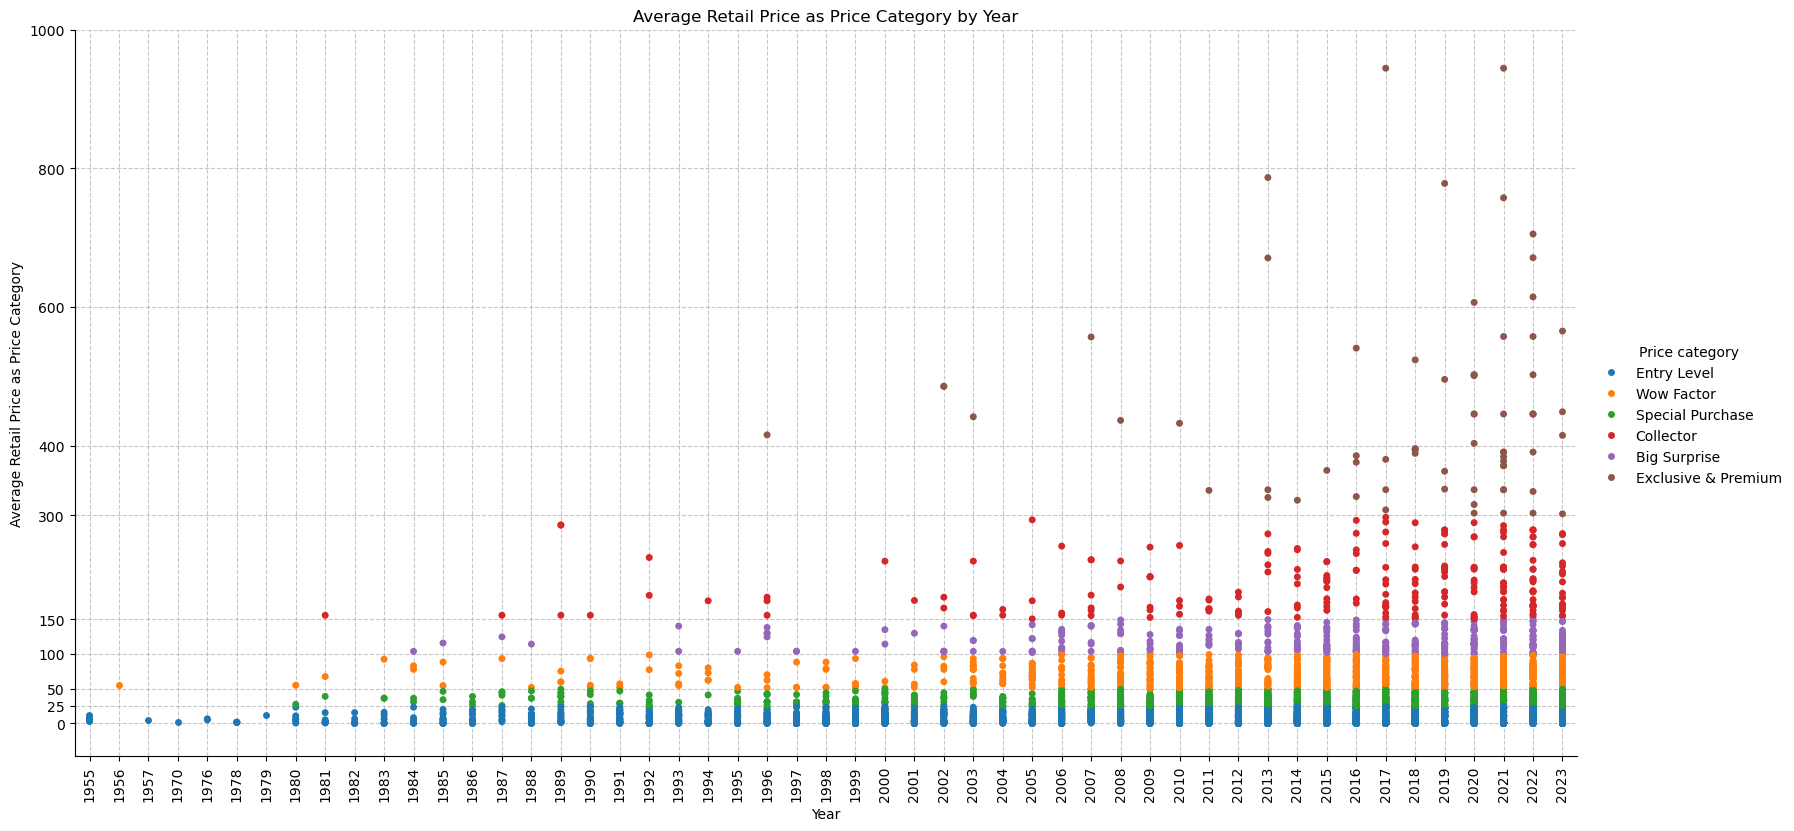

In [25]:
#plotting the average price as categories on the LEGO timeline 
#creating labels for legend
price_labels = ['Entry Level (0-25)', 
                'Special Purchase (25-50)', 
                'Wow Factor (50-100)', 
                'Big Surprise (100-150)', 
                'Serious Collector (150-300)',
                'Exclusive (300+)']

#setting up plot
year_rp_cat = sns.catplot(
    data=df_lego_analysis, x='year_period', y='avg_rp', 
    jitter=False, hue='Price category',
    height=8, aspect=2
)

#layout
plt.xticks(rotation=90) 
plt.title('Average Retail Price as Price Category by Year')
plt.xlabel('Year')
plt.yticks(ticks=[0, 25, 50, 100, 150, 300, 400, 600, 800, 1000])
plt.ylabel('Average Retail Price as Price Category')

plt.grid(which='both', axis='both', linestyle='--', alpha=0.7)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

## **4. HYPOTHESIS**

#### **LEGO’s lifetime engagement strategy focuses on the "inner child," adapting products to match the evolving interests and budgets of loyal, aging fans.**

1. What does the yearly release of LEGO sets by age look like? 
2. AFOl:
   - What is the proportion of 18+ LEGO sets by market? What do 18+ LEGO sets consist of? Seeding AFOL exclusives through multiple age-appropriate versions that grow with their audience. 

### **1. What does the yearly release of LEGO sets by age look like?**

In [31]:
# check the number of unique sets in 'df_lego_analysis'
sum_sets = df_lego_analysis['set_num'].nunique()
print(f"Total sets in df_lego_analysis: {sum_sets}")

Total sets in df_lego_analysis: 7647


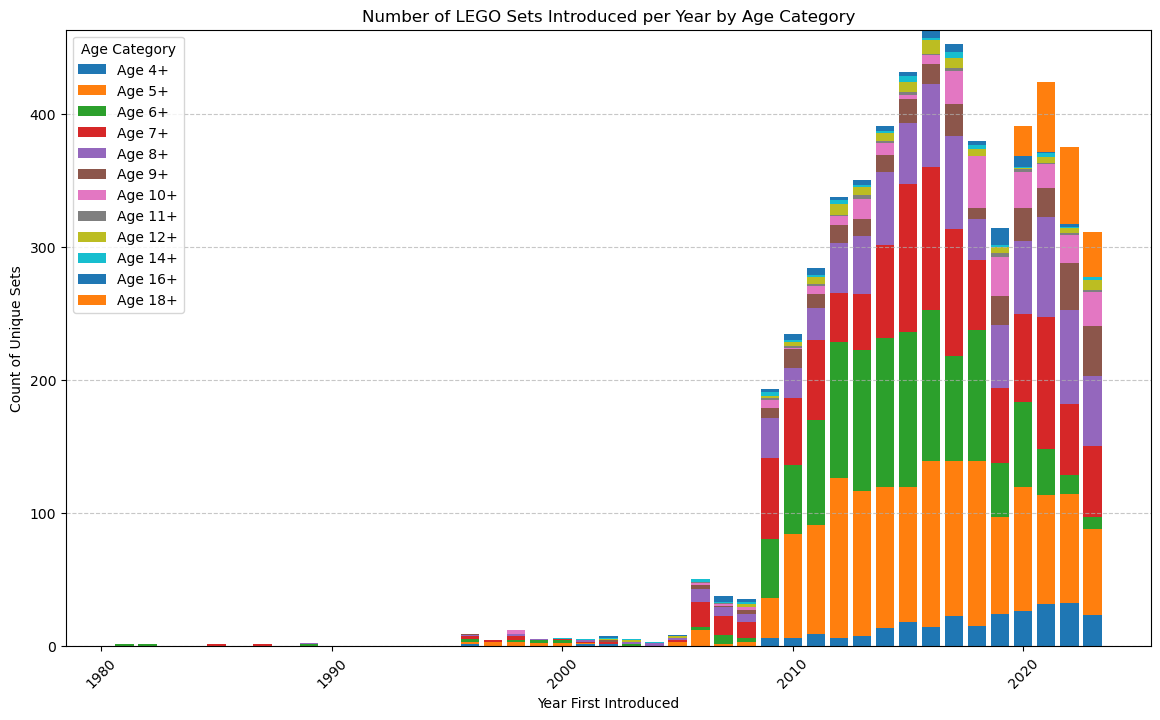

In [32]:
# look into the introduction of sets per year by age
# filter df 
df_lego_analysis['minAge'] = pd.to_numeric(df_lego_analysis['minAge'], errors='coerce')

# get unique ages and define ages as list
ages = df_lego_analysis['minAge'].dropna().unique()
ages = pd.Series(ages).sort_values().tolist()

# filter on age
df_lego_ages = df_lego_analysis[df_lego_analysis['minAge'].isin(ages)]

# count sets by age and year
df_lego_ages_year = df_lego_ages.groupby(['minAge', 'year']).agg(set_count=('set_num', 'nunique')).reset_index()

# pivot for stacking
df_pivot = df_lego_ages_year.pivot(index='year', columns='minAge', values='set_count').fillna(0)

# plot pivot
plt.figure(figsize=(14, 8))
bottom = pd.Series([0] * len(df_pivot.index), index=df_pivot.index)

# loop through age cat
for min_age in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[min_age], bottom=bottom, label=f'Age {int(min_age)}+')
    bottom += df_pivot[min_age]  # Update the bottom for the next age group

# layout
plt.xlabel('Year First Introduced')
plt.ylabel('Count of Unique Sets')
plt.title('Number of LEGO Sets Introduced per Year by Age Category')
plt.legend(title='Age Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# print
plt.show()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**PREP INTRO SETS BY YEAR FOR TABLEAU**

In [35]:
# prepare data in df_pivot to plot in Tableau
# convert age to numeric
df_lego_analysis['minAge'] = pd.to_numeric(df_lego_analysis['minAge'], errors='coerce')

# create a long table
df_long_age = (df_lego_analysis.dropna(subset=['minAge']).groupby(['year_period', 'minAge']).agg(set_count=('set_num', 'nunique')).reset_index()
    .rename(columns={'year_period': 'year'}))

# print
df_long_age

,year,minAge,set_count
0,1981,6.0,1
1,1982,6.0,1
2,1985,7.0,1
3,1987,7.0,1
4,1989,6.0,1
...,...,...,...
236,2023,10.0,26
237,2023,11.0,1
238,2023,12.0,8
239,2023,14.0,2


In [36]:
# export df to csv for tableau
df_long_age[['year', 'minAge', 'set_count']].to_csv(os.path.join(parent_path, '2 Data','Exported data', 'sets_age_intro_year.csv'))

**Reference for age grouping**

> Early Childhood (Preschool):
Ages 4.0 - 5.0
Skills focus: Fine motor skills, early problem-solving, imaginative play, basic spatial awareness.

> Middle Childhood (Early School Age):
Ages 6.0 - 7.0
Skills focus: Logical reasoning, structured play, collaborative skills, introduction to reading instructions, basic STEM concepts.

> Late Childhood (Later School Age):
Ages 8.0 - 12.0
Skills focus: Enhanced spatial skills, problem-solving, independence in play, ability to handle complex instructions, advanced STEM skills, and interest in themes or narratives.

> Early Adolescence:
Ages 14.0 - 16.0
Skills focus: Strategic thinking, intricate building, critical thinking, exploration of specific themes or fandoms, collection-focused play, and social engagement in play.

> (Young) Adult:
Ages 18.0+
Skills focus: Advanced problem-solving, highly detailed builds, appreciation for collectibles, thematic complexity, interest in engineering or design elements, and nostalgia-driven engagement.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### **2. AFOL: Adult Fans Of LEGO**

**2.1 How does LEGO distribute its set portfolio across age?**

In [41]:
# see age range and set count
counts_by_age = df_lego_analysis['minAge'].value_counts().reset_index()

# print
counts_by_age

,minAge,count
0,5.0,1424
1,6.0,1121
2,7.0,1090
3,8.0,767
4,9.0,292
5,4.0,256
6,10.0,250
7,18.0,171
8,12.0,95
9,16.0,76


In [42]:
# add column with proportion of sets by age 
counts_by_age['proportion'] = (counts_by_age['count']/sum_sets)*100

# round proportion 
counts_by_age['proportion'] = counts_by_age['proportion'].round(2)

# sort minAge
counts_by_age = counts_by_age.sort_values(by='minAge').reset_index(drop=True)

# print
counts_by_age

,minAge,count,proportion
0,4.0,256,3.35
1,5.0,1424,18.62
2,6.0,1121,14.66
3,7.0,1090,14.25
4,8.0,767,10.03
5,9.0,292,3.82
6,10.0,250,3.27
7,11.0,26,0.34
8,12.0,95,1.24
9,14.0,48,0.63


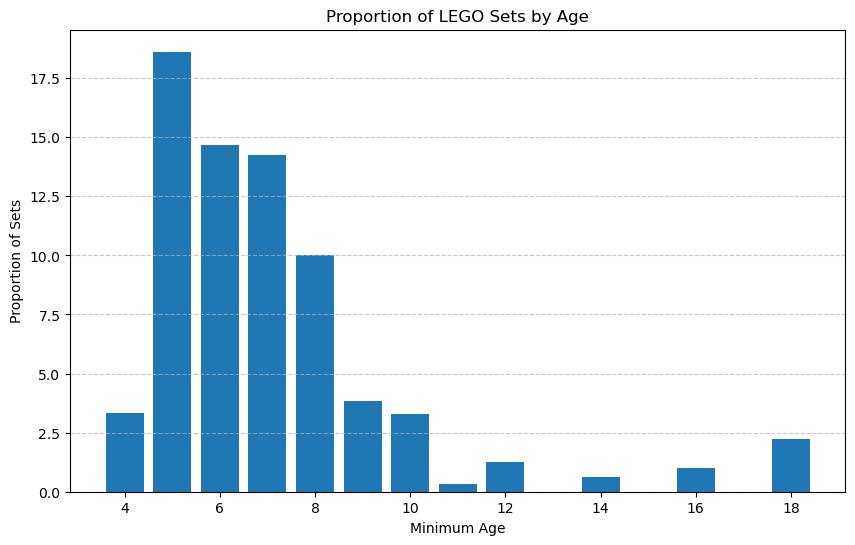

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(counts_by_age['minAge'], counts_by_age['proportion'])

# layout
plt.xlabel('Minimum Age')
plt.ylabel('Proportion of Sets')
plt.title('Proportion of LEGO Sets by Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show
plt.show()

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**PREP. FOR TABLEAU**

In [46]:
# export df to csv for tableau
counts_by_age.to_csv(os.path.join(parent_path, '2 Data','Exported data', 'set_count_prop_age_.csv'))

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**What is the makeup of 18+ LEGO sets?**

In [49]:
# filter df on 18+ sets only and save as copy
df_18 = df_lego_analysis[df_lego_analysis['minAge'] == 18].copy()

In [50]:
# add flag
df_18.loc[:, 'flag'] = 'eighteen'

In [51]:
df_18.shape[0]

171

In [52]:
# export df to csv for tableau
df_18.to_csv(os.path.join(parent_path, '2 Data','Exported data', '18.csv'))

In [53]:
# filter df on count of 18+ themes, their set count and year of introduction
df_18_themes = df_18.groupby('theme').agg(set_count=('set_num', 'nunique'), first_year=('year', 'min')).reset_index()

# print
df_18_themes

,theme,set_count,first_year
0,Architecture,4,2020
1,Art,12,2020
2,Bricklink,15,2021
3,DC Comics Super Heroes,5,2020
4,Disney,3,2020
5,Harry Potter,2,2021
6,Icons,51,2020
7,Ideas,20,2020
8,Indiana Jones,1,2023
9,Jurassic World,1,2022


**What did adults turn to before the 18+ branding?**

**External insight: AFOL before 18+ sets**
Adults have always been playing with LEGO. We’re all familiar with wonderful anecdotes about adults who are LEGO fans, like my favorite story of "Grandpa LEGO", who moved into a former doctor’s office and uses the practice as his LEGO workspace. The cabinets with countless drawers are perfect for storing and storing LEGO, and the display cabinets are ideal for showcasing his LEGO builds. So, what LEGO sets did grown-ups adopt before the introduction of 18+ sets?

**LEGO AFOL Timeline** via https://en.wikipedia.org/wiki/Lego_Icons

1986-1999: LEGO Model Team
LEGO Model Team marked one of LEGO’s first ventures into creating sets with more complexity and realism, targeting older builders with detailed, display-worthy vehicles. This theme paved the way for LEGO’s focus on mature audiences, founding the AFOL community. 

Mid-2000s: LEGO Advanced Models
Advanced Models succeeded LEGO Model Team, explicitly catering to teens and adults. These sets featured challenging builds, intricate designs, and higher piece counts, appealing to hobbyists and collectors. In response to AFOL community feedback.

2013: LEGO Creator Expert
LEGO Creator Expert emerged as a rebranding of Advanced Models. As a subbrand of LEGO Creator, it formalized the focus on sophisticated builds, with iconic releases like modular buildings, landmarks, and vehicles.

2020: Creator Expert Gets the 18+ Label
To better signal its appeal to adults, LEGO introduced the 18+ label. This marketing shift broadened the audience and established the sets as premium products for adult fans of LEGO (AFOLs). “We have decided to stop using the Creator Expert branding and, instead, use the new adult-focused packaging design to make it clearer which hobbies or brand products they can relate to.” https://brickset.com/article/51364/lego-ditches-creator-expert-branding-in-favour-of-18-marking#google_vignette

2022: LEGO Icons
Creator Expert was rebranded to LEGO Icons, solidifying its identity as a theme for adult builders. LEGO Icons encompasses modular buildings, botanical sets, nostalgic models, and more, maintaining its legacy as a cornerstone for AFOLs. 

**Check prior to 18+ branded adult targeted LEGO series**

In [58]:
# filter df on count of afol themes and year of introduction
df_afol_themes = df_lego_analysis.groupby('theme').agg(set_count=('set_num', 'nunique'), first_year=('year', 'min')).reset_index()

# filter df on specific themes
themes = ['Model Team', 'Advanced models', 'Creator Expert']
df_afol_themes = df_afol_themes[df_afol_themes['theme'].isin(themes)]

# print
df_afol_themes

,theme,set_count,first_year
1,Advanced models,29,2002
31,Creator Expert,36,2013
75,Model Team,10,1986


In [59]:
# filter df on theme and time span
df_creatorexpert = df_lego_analysis[df_lego_analysis['theme'].isin(['Creator Expert'])]

# get counts of sets released by year for themes
df_creatorexpert = df_creatorexpert.groupby(['theme', 'minAge', 'year']).agg(set_count=('set_num', 'nunique')).reset_index()

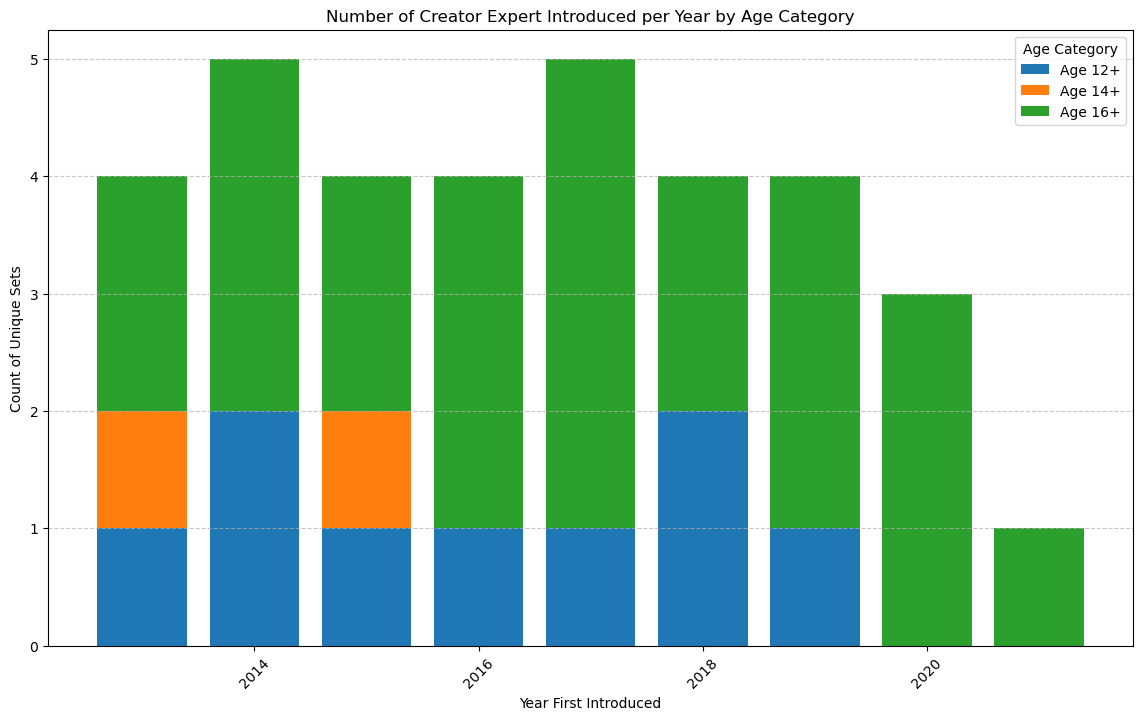

In [60]:
# pivot for stacking
df_pivot_creatorexpert = df_creatorexpert.pivot(index='year', columns='minAge', values='set_count').fillna(0)

# plot pivot
plt.figure(figsize=(14, 8))
bottom = pd.Series([0] * len(df_pivot_creatorexpert.index), index=df_pivot_creatorexpert.index)

# loop through age cat
for min_age in df_pivot_creatorexpert.columns:
    plt.bar(df_pivot_creatorexpert.index, df_pivot_creatorexpert[min_age], bottom=bottom, label=f'Age {int(min_age)}+')
    bottom += df_pivot_creatorexpert[min_age]  
    
# layout
plt.xlabel('Year First Introduced')
plt.ylabel('Count of Unique Sets')
plt.title('Number of Creator Expert Introduced per Year by Age Category')
plt.legend(title='Age Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# print'
plt.show()

In [61]:
# filter df on theme and time span
df_advancedmodels = df_lego_analysis[df_lego_analysis['theme'].isin(['Advanced models'])]

# get counts of sets released by year for themes
df_advancedmodels = df_advancedmodels.groupby(['theme', 'minAge', 'year']).agg(set_count=('set_num', 'nunique')).reset_index()

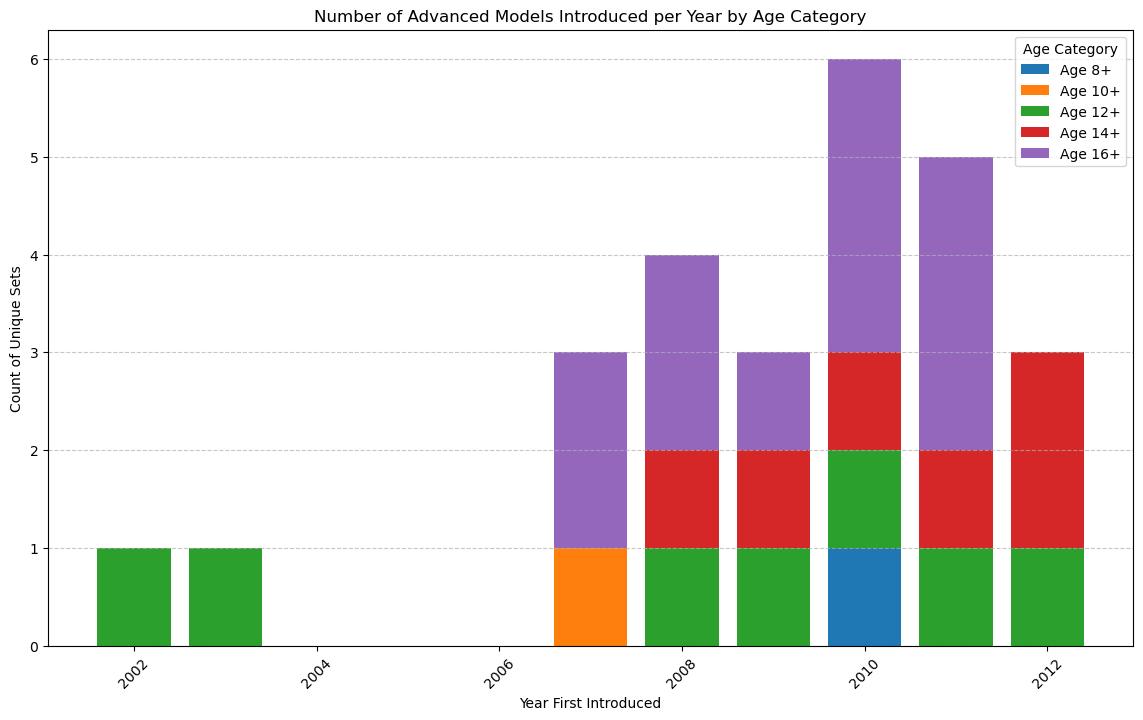

In [62]:
# pivot for stacking
df_pivot_advancedmodels = df_advancedmodels.pivot(index='year', columns='minAge', values='set_count').fillna(0)

# plot pivot
plt.figure(figsize=(14, 8))
bottom = pd.Series([0] * len(df_pivot_advancedmodels.index), index=df_pivot_advancedmodels.index)

# loop through age cat
for min_age in df_pivot_advancedmodels.columns:
    plt.bar(df_pivot_advancedmodels.index, df_pivot_advancedmodels[min_age], bottom=bottom, label=f'Age {int(min_age)}+')
    bottom += df_pivot_advancedmodels[min_age]  
    
# layout
plt.xlabel('Year First Introduced')
plt.ylabel('Count of Unique Sets')
plt.title('Number of Advanced Models Introduced per Year by Age Category')
plt.legend(title='Age Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# print'
plt.show()

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**Build comprehensive table of AFOL timeline, based on external info**

In [65]:
# table AFOl themes
# filter df on specific themes
df_afol_wide = df_lego_analysis[df_lego_analysis['theme'].isin(themes)]

# print
df_afol_wide

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
1398,1480,77942-1,31804,Fiat 500,2021,Creator Expert,Model making,Vehicles,Normal,960.0,...,3.0,314.0,0.00,101.9864,0.0000,0.0000,0.0000,20.40,NaN,Entry Level
1427,1509,10271-1,29962,Fiat 500,2020,Creator Expert,Model making,Vehicles,Normal,960.0,...,3.0,314.0,89.99,95.1864,102.6921,94.3882,98.7974,96.21,NaN,Wow Factor
1431,1514,10272-1,29878,Old Trafford - Manchester United,2020,Creator Expert,Model making,Stadiums,Normal,3898.0,...,1.0,366.0,299.99,333.1864,276.4921,330.3882,337.9974,315.61,NaN,Exclusive & Premium
1432,1515,10270-1,29830,Bookshop,2020,Creator Expert,Model making,Modular Buildings Collection,Normal,2504.0,...,1.0,624.0,199.99,231.1864,197.4921,235.9882,246.9974,222.33,NaN,Collector
1928,2100,10264-1,28559,Corner Garage,2019,Creator Expert,Model making,Modular Buildings Collection,Normal,2569.0,...,2.0,619.0,199.99,217.5864,213.2921,212.3882,215.7974,211.81,NaN,Collector
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,7943,5571-1,2813,Giant Truck,1996,Model Team,Model making,NaN,Normal,1757.0,...,2.0,306.0,0.00,0.0000,0.0000,0.0000,2079.7400,415.95,NaN,Exclusive & Premium
7466,7989,5541-1,2804,Blue Fury,1995,Model Team,Model making,NaN,Normal,421.0,...,2.0,149.0,0.00,0.0000,0.0000,0.0000,182.0000,36.40,400-500,Special Purchase
7489,8013,5591-1,2818,Mach II Red Bird Rig,1994,Model Team,Model making,NaN,Normal,1172.0,...,3.0,281.0,0.00,0.0000,0.0000,0.0000,883.7400,176.75,NaN,Collector
7610,8143,5550-1,2808,Custom Rally Van,1991,Model Team,Model making,NaN,Normal,525.0,...,2.0,149.0,0.00,0.0000,0.0000,0.0000,90.9974,18.20,500-600,Entry Level


In [66]:
# clean
df_afol_wide = df_afol_wide.drop(columns=['Unnamed: 0'])

In [67]:
# check dups
df_afol_wide.duplicated().sum()

0

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**Build comprehensive table of AFOL timeline, based on label LEGO exclusives**

In [70]:
# get AFOL sets bit by bit on theme and age
df_factory = df_lego_analysis[
    (df_lego_analysis['theme'] == 'Factory') & 
(df_lego_analysis['minAge'] == 16)]

# print
df_factory

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
6555,7030,10183-1,5864,Hobby Trains,2007,Factory,Miscellaneous,Trains,Normal,1080.0,...,2.0,173.0,0.0,0.0,0.0,0.0,259.74,51.95,NaN,Wow Factor


In [71]:
# get AFOL sets bit by bit on theme and age and set count
df_harrypotter = df_lego_analysis[
    (df_lego_analysis['theme'] == 'Harry Potter') &
    (df_lego_analysis['minAge'] == 14) &
    (df_lego_analysis['pieces'] >= 1000)
]
# print
df_harrypotter

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
5732,6093,10217-1,8201,Diagon Alley,2011,Harry Potter,Licensed,General,Normal,2025.0,...,1.0,339.0,149.99,180.8664,157.9921,0.0,337.74,165.32,NaN,Collector
5733,6094,10217-1,8201,Diagon Alley,2011,Harry Potter,Licensed,General,Normal,2025.0,...,1.0,339.0,149.99,180.8664,157.9921,0.0,337.74,165.32,NaN,Collector


In [72]:
# get AFOL sets bit by bit on theme and age
df_monsterfighters = df_lego_analysis[
    (df_lego_analysis['theme'] == 'Monster Fighters') &
    (df_lego_analysis['minAge'] == 14)
]
# print
df_monsterfighters

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
5420,5747,10228-1,9358,Haunted House,2012,Monster Fighters,Action/Adventure,NaN,Normal,2064.0,...,1.0,224.0,179.99,203.9864,157.9921,0.0,369.707,182.34,NaN,Collector


In [73]:
# get AFOL sets bit by bit on theme and age
df_architecture = df_lego_analysis[
    (df_lego_analysis['theme'] == 'Architecture') &
    (df_lego_analysis['themeGroup'] == 'Model making') &
    (df_lego_analysis['minAge'] == 16)
]
# print
df_architecture

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
1439,1525,21052-1,29745,Dubai,2020,Architecture,Model making,Skylines,Normal,740.0,...,1.0,145.0,59.99,74.7864,63.1921,70.7882,72.7974,68.31,700-800,Wow Factor
1447,1535,21051-1,29744,Tokyo,2020,Architecture,Model making,Skylines,Normal,547.0,...,1.0,185.0,59.99,74.7864,63.1921,70.7882,72.7974,68.31,500-600,Wow Factor
1949,2125,21045-1,29037,Trafalgar Square,2019,Architecture,Model making,Landmark Series,Normal,1197.0,...,1.0,247.0,79.99,108.7864,78.9921,94.3882,96.1974,91.67,NaN,Wow Factor
1950,2126,21046-1,29036,Empire State Building,2019,Architecture,Model making,Landmark Series,Normal,1767.0,...,1.0,145.0,129.99,122.3864,126.3921,117.9882,116.9974,122.75,NaN,Big Surprise
4793,5064,21050-1,22843,Studio,2013,Architecture,Model making,Miscellaneous,Normal,1210.0,...,1.0,77.0,159.99,217.5864,0.0000,188.7882,181.9974,149.67,NaN,Big Surprise
5750,6114,21010-1,8795,Robie House,2011,Architecture,Model making,Architect Series,Normal,2276.0,...,1.0,100.0,199.99,231.1864,197.4921,0.0000,260.0000,177.73,NaN,Collector
6232,6662,21005-1,7131,Fallingwater,2009,Architecture,Model making,Architect Series,Normal,811.0,...,1.0,63.0,99.99,101.9864,102.6921,106.1882,182.0000,118.57,800-900,Big Surprise


In [74]:
# get AFOL sets bit by bit on subthemes and age
df_starwars_afol = df_lego_analysis[
    (df_lego_analysis['theme'].str.lower() == 'star wars') &
        ((df_lego_analysis['subtheme'].str.lower() == 'episode v') |
        (df_lego_analysis['subtheme'].str.lower() == 'episode iv') |
        (df_lego_analysis['subtheme'].str.lower() == 'ultimate collector series') |
        (df_lego_analysis['subtheme'].str.lower() == 'the clone wars')) &
    ((df_lego_analysis['minAge'] == 14) | (df_lego_analysis['minAge'] == 16))
]

# print
df_starwars_afol

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
2286,2479,75252-1,28594,Imperial Star Destroyer,2019,Star Wars,Licensed,Ultimate Collector Series,Normal,4784.0,...,1.0,483.0,699.99,836.3864,671.4921,825.9882,857.9974,778.37,NaN,Exclusive & Premium
2746,2956,75181-1,27832,Y-wing Starfighter,2018,Star Wars,Licensed,Ultimate Collector Series,Normal,1967.0,...,1.0,401.0,199.99,231.1864,197.4921,235.9882,246.9974,222.33,NaN,Collector
3271,3494,75144-1,25727,Snowspeeder,2017,Star Wars,Licensed,Ultimate Collector Series,Normal,1703.0,...,2.0,391.0,199.99,231.1864,181.6921,235.9882,155.9974,200.97,NaN,Collector
3301,3526,75192-1,26725,Millennium Falcon,2017,Star Wars,Licensed,Ultimate Collector Series,Normal,7541.0,...,2.0,726.0,849.99,999.5864,829.4921,1002.9882,1039.9974,944.41,NaN,Exclusive & Premium
3805,4038,75159-1,25864,Death Star,2016,Star Wars,Licensed,Ultimate Collector Series,Normal,4016.0,...,2.0,514.0,499.99,557.5864,473.9921,575.1202,598.0000,540.94,NaN,Exclusive & Premium
4241,4488,75060-1,23682,Slave I,2015,Star Wars,Licensed,Ultimate Collector Series,Normal,1996.0,...,1.0,415.0,199.99,244.7864,181.6921,235.9882,160.2874,204.55,NaN,Collector
4264,4512,75095-1,24083,TIE Fighter,2015,Star Wars,Licensed,Ultimate Collector Series,Normal,1685.0,...,1.0,195.0,199.99,244.7864,181.6921,235.9882,185.6400,209.62,NaN,Collector
4694,4963,75059-1,23529,Sandcrawler,2014,Star Wars,Licensed,Ultimate Collector Series,Normal,3296.0,...,2.0,302.0,299.99,339.9864,276.4921,353.9882,338.0000,321.69,NaN,Exclusive & Premium
4776,5047,10240-1,22578,Red Five X-wing Starfighter,2013,Star Wars,Licensed,Ultimate Collector Series,Normal,1559.0,...,1.0,337.0,199.99,231.1864,197.4921,235.9882,278.2000,228.57,NaN,Collector
5416,5743,10225-1,9286,R2-D2,2012,Star Wars,Licensed,Ultimate Collector Series,Normal,2127.0,...,2.0,300.0,179.99,203.9864,181.6921,0.0000,213.1974,155.77,NaN,Collector


In [75]:
# part 1: stack all LEGO exclusive dfs 
df_lego_exclusives = pd.concat([df_factory, df_harrypotter, df_monsterfighters, df_architecture,df_starwars_afol], ignore_index=True)

# print 
df_lego_exclusives

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
0,7030,10183-1,5864,Hobby Trains,2007,Factory,Miscellaneous,Trains,Normal,1080.0,...,2.0,173.0,0.00,0.0000,0.0000,0.0000,259.7400,51.95,NaN,Wow Factor
1,6093,10217-1,8201,Diagon Alley,2011,Harry Potter,Licensed,General,Normal,2025.0,...,1.0,339.0,149.99,180.8664,157.9921,0.0000,337.7400,165.32,NaN,Collector
2,6094,10217-1,8201,Diagon Alley,2011,Harry Potter,Licensed,General,Normal,2025.0,...,1.0,339.0,149.99,180.8664,157.9921,0.0000,337.7400,165.32,NaN,Collector
3,5747,10228-1,9358,Haunted House,2012,Monster Fighters,Action/Adventure,NaN,Normal,2064.0,...,1.0,224.0,179.99,203.9864,157.9921,0.0000,369.7070,182.34,NaN,Collector
4,1525,21052-1,29745,Dubai,2020,Architecture,Model making,Skylines,Normal,740.0,...,1.0,145.0,59.99,74.7864,63.1921,70.7882,72.7974,68.31,700-800,Wow Factor
5,1535,21051-1,29744,Tokyo,2020,Architecture,Model making,Skylines,Normal,547.0,...,1.0,185.0,59.99,74.7864,63.1921,70.7882,72.7974,68.31,500-600,Wow Factor
6,2125,21045-1,29037,Trafalgar Square,2019,Architecture,Model making,Landmark Series,Normal,1197.0,...,1.0,247.0,79.99,108.7864,78.9921,94.3882,96.1974,91.67,NaN,Wow Factor
7,2126,21046-1,29036,Empire State Building,2019,Architecture,Model making,Landmark Series,Normal,1767.0,...,1.0,145.0,129.99,122.3864,126.3921,117.9882,116.9974,122.75,NaN,Big Surprise
8,5064,21050-1,22843,Studio,2013,Architecture,Model making,Miscellaneous,Normal,1210.0,...,1.0,77.0,159.99,217.5864,0.0000,188.7882,181.9974,149.67,NaN,Big Surprise
9,6114,21010-1,8795,Robie House,2011,Architecture,Model making,Architect Series,Normal,2276.0,...,1.0,100.0,199.99,231.1864,197.4921,0.0000,260.0000,177.73,NaN,Collector


In [76]:
# clean df_lego_exclusives
df_lego_exclusives = df_lego_exclusives.drop(columns=['Unnamed: 0'])

In [77]:
# check for dups
df_lego_exclusives.duplicated().sum()

0

In [78]:
# part 2: stack all AFOl sets prior to 18+ branding: LEGO Exclusives label + Model Team, Advanced Models and Creator Expert
df_afol = pd.concat([df_lego_exclusives, df_afol_wide], ignore_index=True)

# print 
df_afol

,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,minifigs,...,num_materials,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category
0,10183-1,5864,Hobby Trains,2007,Factory,Miscellaneous,Trains,Normal,1080.0,NaN,...,2.0,173.0,0.00,0.0000,0.0000,0.0000,259.7400,51.95,NaN,Wow Factor
1,10217-1,8201,Diagon Alley,2011,Harry Potter,Licensed,General,Normal,2025.0,12.0,...,1.0,339.0,149.99,180.8664,157.9921,0.0000,337.7400,165.32,NaN,Collector
2,10217-1,8201,Diagon Alley,2011,Harry Potter,Licensed,General,Normal,2025.0,12.0,...,1.0,339.0,149.99,180.8664,157.9921,0.0000,337.7400,165.32,NaN,Collector
3,10228-1,9358,Haunted House,2012,Monster Fighters,Action/Adventure,NaN,Normal,2064.0,6.0,...,1.0,224.0,179.99,203.9864,157.9921,0.0000,369.7070,182.34,NaN,Collector
4,21052-1,29745,Dubai,2020,Architecture,Model making,Skylines,Normal,740.0,NaN,...,1.0,145.0,59.99,74.7864,63.1921,70.7882,72.7974,68.31,700-800,Wow Factor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5571-1,2813,Giant Truck,1996,Model Team,Model making,NaN,Normal,1757.0,NaN,...,2.0,306.0,0.00,0.0000,0.0000,0.0000,2079.7400,415.95,NaN,Exclusive & Premium
119,5541-1,2804,Blue Fury,1995,Model Team,Model making,NaN,Normal,421.0,NaN,...,2.0,149.0,0.00,0.0000,0.0000,0.0000,182.0000,36.40,400-500,Special Purchase
120,5591-1,2818,Mach II Red Bird Rig,1994,Model Team,Model making,NaN,Normal,1172.0,NaN,...,3.0,281.0,0.00,0.0000,0.0000,0.0000,883.7400,176.75,NaN,Collector
121,5550-1,2808,Custom Rally Van,1991,Model Team,Model making,NaN,Normal,525.0,NaN,...,2.0,149.0,0.00,0.0000,0.0000,0.0000,90.9974,18.20,500-600,Entry Level


In [79]:
# add flag
df_afol.loc[:, 'flag'] = 'afol'

In [80]:
# export df to csv for tableau
df_afol.to_csv(os.path.join(parent_path, '2 Data','Exported data', 'afol.csv'))

In [81]:
# stack df 18 and df afol
df_18_afol = pd.concat([df_18, df_afol], ignore_index=True)

In [82]:
# export df to csv for tableau
df_18_afol.to_csv(os.path.join(parent_path, '2 Data','Exported data', '18_afol.csv'))

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**Seeding AFOL through multiple age-appropriate versions that grow with their audience.**

In [85]:
# extract unique themes from df_18_afol
themes_list = df_18_afol['theme'].dropna().unique()

# turn list into pattern
pattern = '|'.join(themes_list)

# filter df on afol themes
sets_afol_themes = df_lego_analysis[df_lego_analysis['theme'].str.contains(pattern, case=False, na=False)].reset_index(drop=True)

# group filtered df by 'name' and drop nulls from age column
sets_afol_themes = sets_afol_themes.groupby('name').agg(theme=('theme', 'first'), set_num=('set_num', lambda x: ', '.join(map(str, set(x)))), minAge=('minAge', lambda x: sorted(set(age for age in x if pd.notna(age))))).reset_index()

# filter for sets that have multiple ages
sets_afol_themes = sets_afol_themes[sets_afol_themes['minAge'].apply(lambda x: len(x) > 1)]

# rename column
sets_afol_themes = sets_afol_themes.rename(columns={'minAge': 'age_cat'})

# print
sets_afol_themes

,name,theme,set_num,age_cat
29,A-wing Starfighter,Star Wars,"30272-1, 75175-1, 75003-1, 75275-1","[7.0, 8.0, 18.0]"
34,ARC-170 Starfighter,Star Wars,"8088-1, 30247-1","[6.0, 8.0]"
38,AT-AT,Star Wars,"75313-1, 75288-1, 75054-1, 4483-1","[9.0, 10.0, 18.0]"
41,AT-DP,Star Wars,"30274-1, 75083-1","[6.0, 8.0]"
44,AT-ST,Star Wars,"30495-1, 75332-1, 7657-1, 30054-1","[4.0, 6.0]"
...,...,...,...,...
1776,Vulture Droid,Star Wars,"30055-1, 75041-1","[6.0, 7.0]"
1823,X-wing Starfighter,Star Wars,"30654-1, 9493-1, 75355-1, 75218-1","[8.0, 18.0]"
1832,Y-wing Starfighter,Star Wars,"75181-1, 75172-1","[8.0, 14.0]"
1834,Yoda,Star Wars,"75255-1, 7194-1","[10.0, 14.0]"


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

**PREP. TABLE FOR TABLEAU EXPORT**

In [88]:
# explode combined values set in columns into multiple rows
exploded_rows = [
    [row['name'], row['theme'], set_num, age_cat]
    for _, row in sets_afol_themes.iterrows()
    for set_num in row['set_num']
    for age_cat in row['age_cat']
]

# exploded df
sets_afol_themes_exploded = pd.DataFrame(exploded_rows, columns=['name', 'theme', 'set_num', 'age_cat'])

# print
sets_afol_themes_exploded

,name,theme,set_num,age_cat
0,A-wing Starfighter,Star Wars,3,7.0
1,A-wing Starfighter,Star Wars,3,8.0
2,A-wing Starfighter,Star Wars,3,18.0
3,A-wing Starfighter,Star Wars,0,7.0
4,A-wing Starfighter,Star Wars,0,8.0
...,...,...,...,...
3471,Z-95 Headhunter,Star Wars,4,8.0
3472,Z-95 Headhunter,Star Wars,-,6.0
3473,Z-95 Headhunter,Star Wars,-,8.0
3474,Z-95 Headhunter,Star Wars,1,6.0


In [89]:
# export df to csv for tableau
sets_afol_themes_exploded.to_csv(os.path.join(parent_path, '2 Data','Exported data', 'multi_age_sets.csv'))

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

#### **2.2 Which market has the most adults playing lego?**

In [92]:
# create container for proportions table
table_prop = []

# collection of markets
markets = ['US', 'CA', 'DE', 'UK', 'PL']

# loop by market in collectons
for market in markets:
    # count all sets with retail prices (whole)
    total_sets = df_lego_analysis[df_lego_analysis[f'{market}_retailPrice'].notna()]['set_num'].nunique()

    # count 18+ sets with retail prices in the market (part)
    sets_18 = df_lego_analysis[(df_lego_analysis[f'{market}_retailPrice'].notna()) & (df_lego_analysis['minAge'] == 18)]['set_num'].nunique()

    # count AFOL sets with retail prices in the market (part)
    afol_sets = df_afol[df_afol[f'{market}_retailPrice'].notna()]['set_num'].nunique()

    # calc proportions
    prop_sets_18 = round((sets_18 / total_sets) * 100, 2) if total_sets > 0 else 0
    prop_afol_sets = round((afol_sets / total_sets) * 100, 2) if total_sets > 0 else 0

    # print
    table_prop.append({
        'Market': market,
        'Total Sets': total_sets,
        '18+ Sets': sets_18,
        'AFOL Sets': afol_sets,
        'Proportion of 18+ Sets (%)': prop_sets_18,
        'Proportion of AFOL Sets (%)': prop_afol_sets
    })

# convert list to df
df_prop = pd.DataFrame(table_prop)

# print df
df_prop

,Market,Total Sets,18+ Sets,AFOL Sets,Proportion of 18+ Sets (%),Proportion of AFOL Sets (%)
0,US,4915,139,92,2.83,1.87
1,CA,4499,139,79,3.09,1.76
2,DE,3414,139,51,4.07,1.49
3,UK,4968,139,93,2.80,1.87
4,PL,6943,166,105,2.39,1.51


In [93]:
# export df to csv for tableau
df_prop.to_csv(os.path.join(parent_path, '2 Data','Exported data', 'market_prop.csv'))

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

## **3. Colors**

LEGO themes become more colorful (y) over time (X). >> Even though the number of colors in a LEGO sets do increase over time, their increase is not based on time. I would want to explore the correlation with theme, based on the assumption that the growth overtime is based on new, more colorful themes were introduced over time.

In [96]:
# create flag for franchise sets
# franchise collection
franchise_themes = ['Avatar', 'Cars', 'Pirates of the Caribbean', 'The Lone Ranger', 'Toy Story', 
                    'Frozen', 'Trolls World Tour', 'The Simpsons', 'Marvel Super Heroes', 'Spider-Man', 
                    'Star Wars', 'Indiana Jones', 'Batman', 'DC Comics Super Heroes', 
                    'DC Super Hero Girls', 'Harry Potter', 'The LEGO Batman Movie', 'The LEGO Movie', 
                    'The LEGO Movie 2', 'The LEGO Ninjago Movie', 'The Lord of the Rings', 'The Hobbit', 
                    'Ben 10: Alien Force', 'Scooby-Doo', 'Jurassic World', 'Minions: The Rise of Gru', 
                    'The Angry Birds Movie', 'Ghostbusters', 'Teenage Mutant Ninja Turtles', 
                    'Prince of Persia', 'Stranger Things', "Gabby's Dollhouse", 'The Powerpuff Girls', 
                    'Mickey Mouse', 'Super Mario', 'Minecraft', 'Overwatch', 'SpongeBob SquarePants', 'Disney', 
                   'BrickHeadz', 'Brick Sketches', 'Speed Champions', 'Unikitty' ]

# flag condition
df_lego_analysis['franchise_flag'] = df_lego_analysis['theme'].apply(
    lambda theme: 'franchise' if theme in franchise_themes else 'non-franchise')

In [97]:
df_lego_analysis.columns

Index(['Unnamed: 0', 'set_number', 'setID', 'name', 'year', 'theme',
       'themeGroup', 'subtheme', 'category', 'pieces', 'minifigs', 'ownedBy',
       'wantedBy', 'rating', 'reviewCount', 'packagingType', 'availability',
       'instructionsCount', 'minAge', 'US_retailPrice', 'UK_retailPrice',
       'CA_retailPrice', 'DE_retailPrice', 'PL_retailPrice', 'status',
       'year_time', 'year_period', 'set_num', 'theme_id', 'num_parts',
       'num_colors', 'num_materials', 'sum_spares', 'US_normalized',
       'UK_normalized', 'CA_normalized', 'DE_normalized', 'PL_normalized',
       'avg_rp', 'custom_bins_col', 'Price category', 'franchise_flag'],
      dtype='object')

In [98]:
# check statistical analysis of total number of colors
df_lego_analysis['num_colors'].describe()

count    7639.000000
mean       13.465637
std         8.300023
min         1.000000
25%         7.000000
50%        12.000000
75%        18.000000
max        53.000000
Name: num_colors, dtype: float64

In [99]:
# check average number of colors by franchise flag
df_lego_analysis.groupby('franchise_flag')['num_colors'].mean().round(0)

franchise_flag
franchise        16.0
non-franchise    13.0
Name: num_colors, dtype: float64

> **Observation:** Franchise sets are on average more colorful 

In [101]:
# frequency count of total number of colors
freq_table = pd.crosstab(df_lego_analysis['num_colors'], 'sum_sets').reset_index()
freq_table.columns = ['num_colors', 'sum_sets']

In [102]:
# calculate average color
weighted_sum = (freq_table['num_colors'] * freq_table['sum_sets']).sum()
total_count = freq_table['sum_sets'].sum()
average = weighted_sum / total_count

# print
average.round(0)

13.0

> **Observation**:
> 1. Color range is 52 (53-1)
> 2. Average number of colors is 13

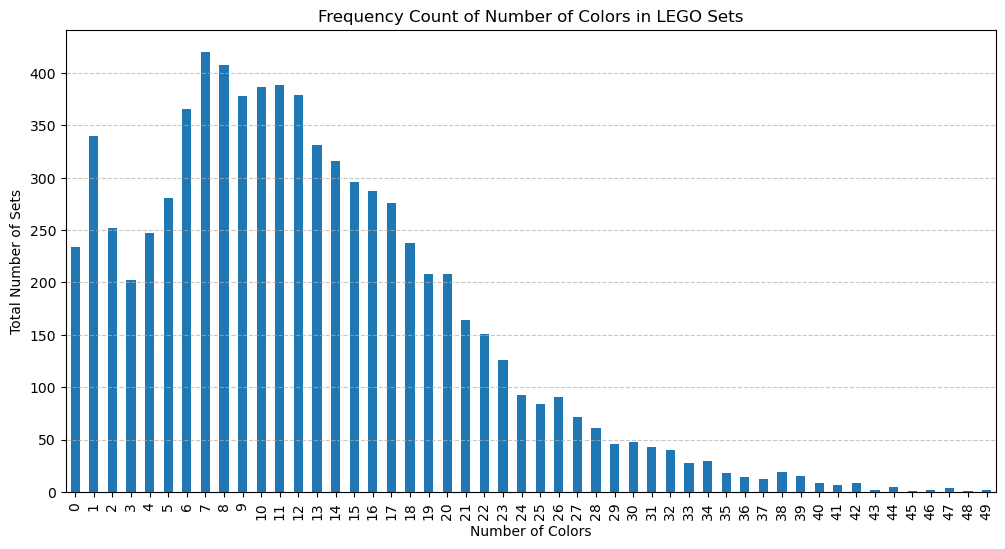

In [104]:
# plot freq table
freq_table['sum_sets'].plot(kind='bar', legend=False, figsize=(12, 6))

# layout
plt.xlabel('Number of Colors')
plt.ylabel('Total Number of Sets')
plt.title('Frequency Count of Number of Colors in LEGO Sets')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

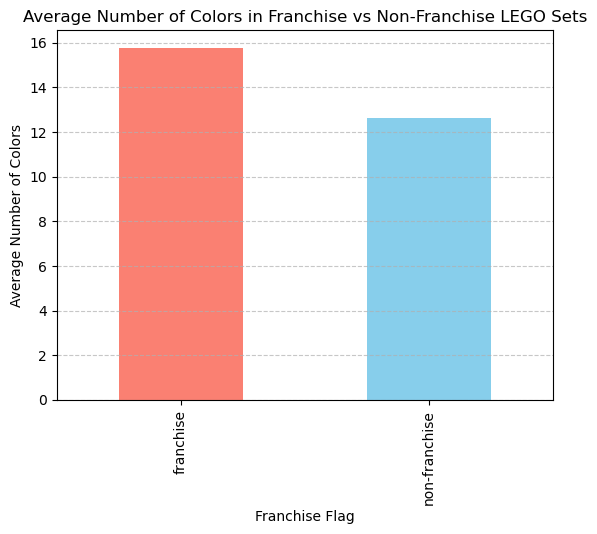

In [105]:
# compare avg. number of colors by franchise flag
avg_colors_by_flag = df_lego_analysis.groupby('franchise_flag')['num_colors'].mean()

# plot
avg_colors_by_flag.plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel('Franchise Flag')
plt.ylabel('Average Number of Colors')
plt.title('Average Number of Colors in Franchise vs Non-Franchise LEGO Sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

> **Observation**: franchise sets have on avergage more colors than non-franchise sets, though the difference is minor

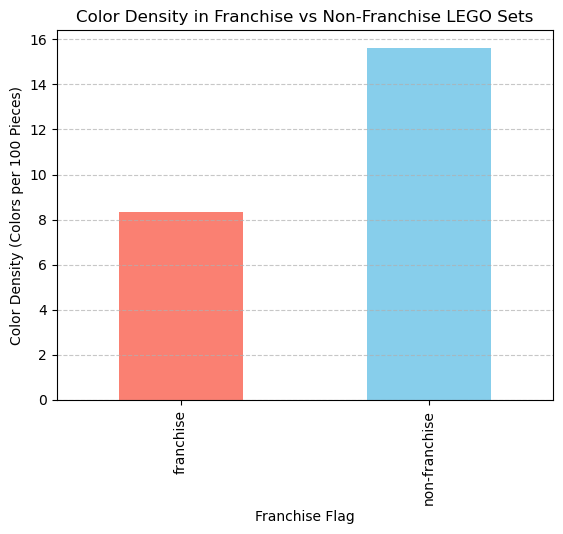

In [107]:
# agg number of colors by 100 pieces
# solve for nulls
df_lego_analysis_filtered = df_lego_analysis[df_lego_analysis['pieces'] > 0].copy()

# create column and calc color density
df_lego_analysis_filtered['color_density'] = (df_lego_analysis_filtered['num_colors'] / df_lego_analysis_filtered['pieces']) * 100

# filter df
color_density_by_flag = df_lego_analysis_filtered.groupby('franchise_flag')['color_density'].mean()

# plot
color_density_by_flag.plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel('Franchise Flag')
plt.ylabel('Color Density (Colors per 100 Pieces)')
plt.title('Color Density in Franchise vs Non-Franchise LEGO Sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

> **Observation**: non-franchise sets have 2x high color density than non-franchise sets

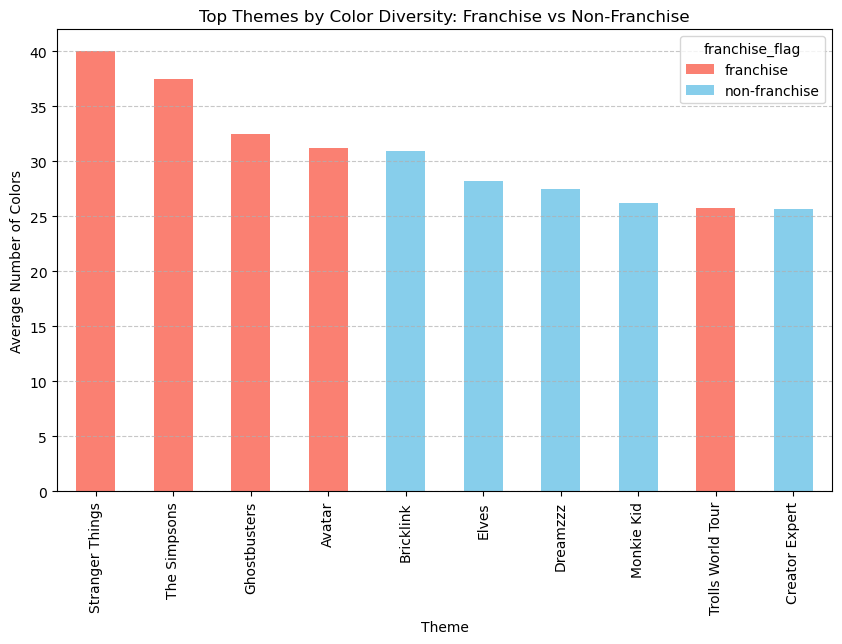

In [109]:
# check number of colors by themes and marked by flag
top_themes = df_lego_analysis.groupby(['theme', 'franchise_flag'])['num_colors'].mean().sort_values(ascending=False).head(10)

# plot 
top_themes.unstack().plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))
plt.xlabel('Theme')
plt.ylabel('Average Number of Colors')
plt.title('Top Themes by Color Diversity: Franchise vs Non-Franchise')
plt.grid(axis='y', linestyle='--', alpha=0.7)

> **Observation**: The top 10 is equally divided by franchise and non franchise sets, where character-driven franchise sets take the lead in color diversity

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

## **4. Minifigs**

One data point showed that LEGO franchise have more minifigs than regular LEGO sets:
- Hypothesis: Franchise sets are character-driven and designed for role play
- Build on this insight by testing ratio minifig:pieces for movie franchises vs. non movie franchises.

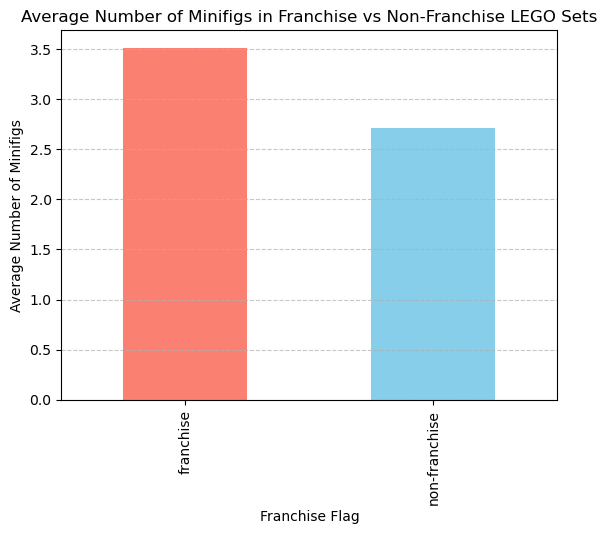

In [114]:
# compare avg. number of colors by franchise flag
avg_mf_by_flag = df_lego_analysis.groupby('franchise_flag')['minifigs'].mean()

# plot
avg_mf_by_flag.plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel('Franchise Flag')
plt.ylabel('Average Number of Minifigs')
plt.title('Average Number of Minifigs in Franchise vs Non-Franchise LEGO Sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

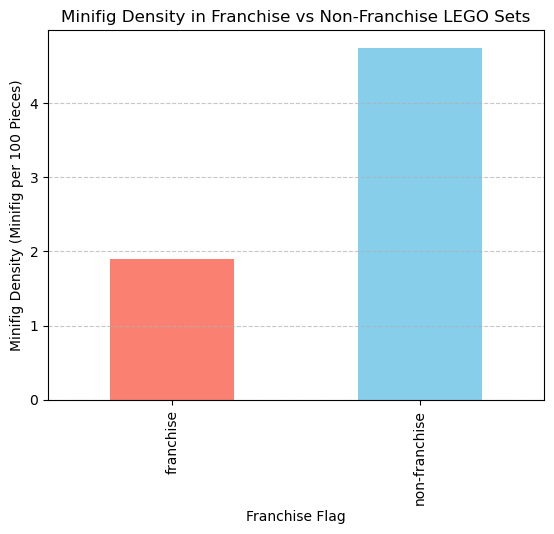

In [115]:
# agg number of minifigs by 100 pieces
# solve for nulls
df_lego_analysis_mf = df_lego_analysis[df_lego_analysis['pieces'] > 0].copy()

# create column and calc mfr density
df_lego_analysis_mf['mf_density'] = (df_lego_analysis_filtered['minifigs'] / df_lego_analysis_filtered['pieces']) * 100

# filter df
mf_density_by_flag = df_lego_analysis_mf.groupby('franchise_flag')['mf_density'].mean()

# plot
mf_density_by_flag.plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel('Franchise Flag')
plt.ylabel('Minifig Density (Minifig per 100 Pieces)')
plt.title('Minifig Density in Franchise vs Non-Franchise LEGO Sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

> **Observation** Franchise sets have more minifigs on average, but have a lower minifig density. This implies:

> larger sets / larger piece count:
> - franchise sets are either larger or more detailed build (which requires more pieces), which lowers the density
> - franchise sets use high piece count for settings the scene for the minifigs, which lowers the minifig density, in other words: minifigs are one of the key elements, but not necessarily the dominant feature

> lower density ratio: 
> - non-franchise sets have a higher minifig:pieces ratio 
> - franchise sets likely prioritize character inclusion over overall piece density per minifig 

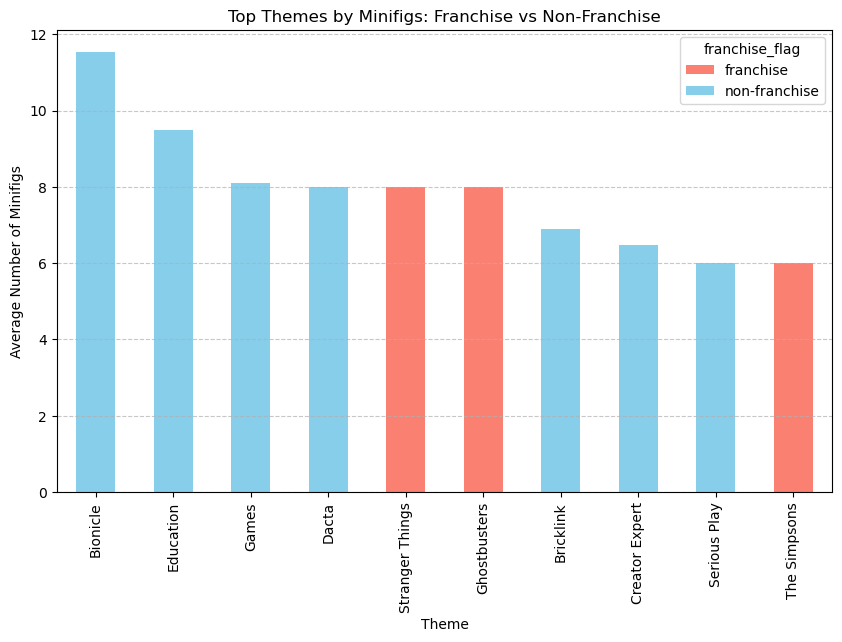

In [117]:
# check number of minifigs by themes and marked by flag
top_mf = df_lego_analysis.groupby(['theme', 'franchise_flag'])['minifigs'].mean().sort_values(ascending=False).head(10)

# plot 
top_mf.unstack().plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))
plt.xlabel('Theme')
plt.ylabel('Average Number of Minifigs')
plt.title('Top Themes by Minifigs: Franchise vs Non-Franchise')
plt.grid(axis='y', linestyle='--', alpha=0.7)

> **Observation** franchise sets do include more minifigs in total, they tend to embed them within larger builds, reducing the minifig-per-piece density. This balance suggests that franchise sets appeal both as play and display pieces, where minifigs complement an elaborate structure rather than being the sole focus

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [120]:
# filter df to franchice sets only
df_franchise = df_lego_analysis[df_lego_analysis['franchise_flag']== 'franchise']

# print
df_franchise

,Unnamed: 0,set_number,setID,name,year,theme,themeGroup,subtheme,category,pieces,...,sum_spares,US_normalized,UK_normalized,CA_normalized,DE_normalized,PL_normalized,avg_rp,custom_bins_col,Price category,franchise_flag
25,25,10785-1,45489,Bakey with Cakey Fun,2023,Gabby's Dollhouse,NaN,NaN,Normal,58.0,...,46.0,10.99,12.2264,0.0000,11.7882,11.9574,9.39,50-75,Entry Level,franchise
26,26,10786-1,45490,Gabby & MerCat's Ship & Spa,2023,Gabby's Dollhouse,NaN,NaN,Normal,88.0,...,65.0,19.99,25.8264,19.7421,24.7682,24.6974,23.00,75-100,Entry Level,franchise
27,27,10787-1,45491,Kitty Fairy's Garden Party,2023,Gabby's Dollhouse,NaN,NaN,Normal,130.0,...,75.0,34.99,33.9864,0.0000,35.3882,33.7974,27.63,100-150,Special Purchase,franchise
28,28,10788-1,45492,Gabby's Dollhouse,2023,Gabby's Dollhouse,NaN,NaN,Normal,498.0,...,198.0,79.99,95.1864,0.0000,94.3882,96.1974,73.15,400-500,Wow Factor,franchise
29,29,10789-1,34321,Spider-Man's Car and Doc Ock,2023,Marvel Super Heroes,Licensed,Spidey and his Amazing Friends,Normal,48.0,...,28.0,9.99,12.2264,11.0521,11.7882,11.9574,11.40,25-50,Entry Level,franchise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,7773,7141-1,3811,Naboo Fighter,1999,Star Wars,Licensed,Episode I,Normal,179.0,...,79.0,0.00,0.0000,0.0000,0.0000,0.0000,0.00,150-200,Entry Level,franchise
7255,7774,7150-1,3817,TIE Fighter & Y-wing,1999,Star Wars,Licensed,Episode IV,Normal,409.0,...,120.0,0.00,0.0000,0.0000,0.0000,4.9400,0.99,400-500,Entry Level,franchise
7256,7775,7151-1,3818,Sith Infiltrator,1999,Star Wars,Licensed,Episode I,Normal,244.0,...,74.0,0.00,0.0000,0.0000,0.0000,155.7400,31.15,200-300,Special Purchase,franchise
7257,7776,7121-1,3800,Naboo Swamp,1999,Star Wars,Licensed,Episode I,Normal,82.0,...,22.0,0.00,0.0000,0.0000,0.0000,46.8000,9.36,75-100,Entry Level,franchise


In [121]:
# check age range in franchise sets 
df_franchise_count = df_franchise['minAge'].value_counts().sort_index()

# convert to df
df_franchise_count = pd.DataFrame(df_franchise_count).reset_index()

# rename colulmns
df_franchise_count.columns = ['minAge', 'N.sets_fran']

# print
df_franchise_count

,minAge,N.sets_fran
0,4.0,66
1,5.0,119
2,6.0,326
3,7.0,316
4,8.0,351
5,9.0,131
6,10.0,143
7,12.0,16
8,14.0,32
9,16.0,23


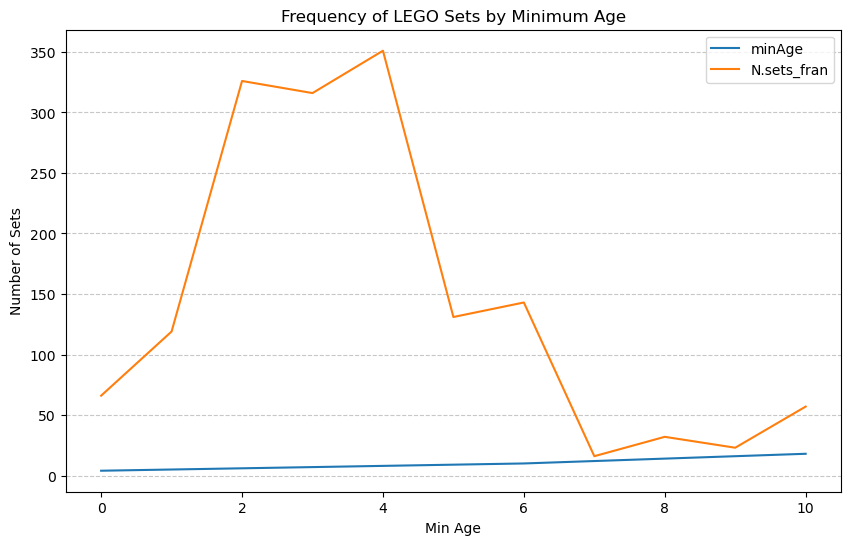

In [122]:
# plot count of franchise sets by age
df_franchise_count.plot (kind='line', figsize=(10,6))

# layout
plt.xlabel('Min Age')
plt.ylabel('Number of Sets')
plt.title('Frequency of LEGO Sets by Minimum Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show
plt.show()

In [123]:
# proportion franchise by age

# agg total sets by age
df_lego_analysis_count = df_lego_analysis['minAge'].value_counts().sort_index()

# convert to df
df_lego_analysis_count = pd.DataFrame(df_lego_analysis_count).reset_index()

# rename colulmns
df_lego_analysis_count.columns = ['minAge', 'N.sets']

# print
df_lego_analysis_count

,minAge,N.sets
0,4.0,256
1,5.0,1424
2,6.0,1121
3,7.0,1090
4,8.0,767
5,9.0,292
6,10.0,250
7,11.0,26
8,12.0,95
9,14.0,48


In [124]:
# proportion franchise sets by age

# merge dfs
df_counting = pd.merge(df_lego_analysis_count, df_franchise_count, on='minAge')

# calc proportion
df_counting['prop_sets_fran'] = ((df_counting['N.sets_fran']/df_counting['N.sets'])*100).round(2)

# print
df_counting

,minAge,N.sets,N.sets_fran,prop_sets_fran
0,4.0,256,66,25.78
1,5.0,1424,119,8.36
2,6.0,1121,326,29.08
3,7.0,1090,316,28.99
4,8.0,767,351,45.76
5,9.0,292,131,44.86
6,10.0,250,143,57.20
7,12.0,95,16,16.84
8,14.0,48,32,66.67
9,16.0,76,23,30.26


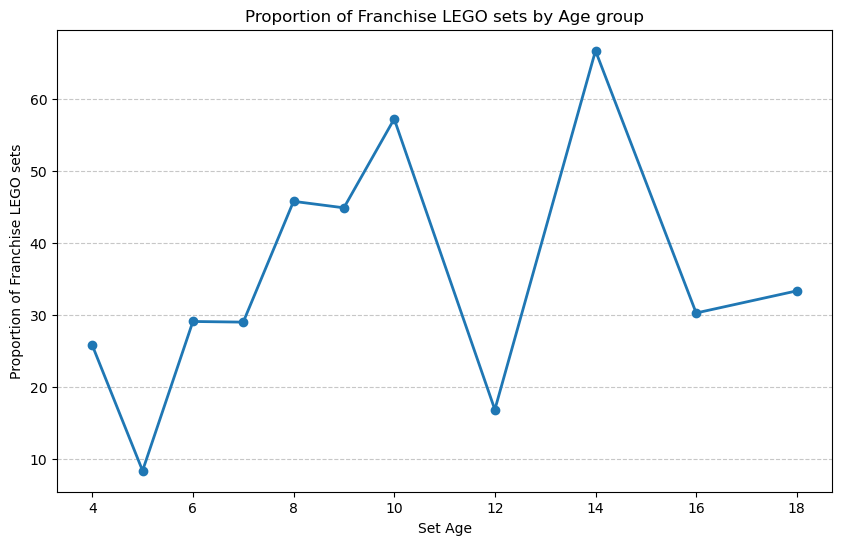

In [125]:
# convert df view to dataframe
df_counting = pd.DataFrame(df_counting)

# plot 
plt.figure(figsize=(10, 6))
plt.plot(df_counting['minAge'], df_counting['prop_sets_fran'], marker='o', linestyle='-', linewidth=2)

# layout
plt.xlabel('Set Age')
plt.ylabel('Proportion of Franchise LEGO sets')
plt.title('Proportion of Franchise LEGO sets by Age group')
plt.grid(axis='y', linestyle='--', alpha=0.7)